In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
np.random.seed(42)

num_samples = 100


Feature1 = np.random.uniform(50, 100, num_samples)
Feature2 = np.random.uniform(30, 90, num_samples)
Feature3 = np.random.uniform(10, 80, num_samples)
Feature4 = np.random.uniform(0, 100, num_samples)
Feature5 = np.random.uniform(20, 85, num_samples)


weights = [0.5, 0.3, 0.2, 0.1, 0.4]

Grade = (
    Feature1 * weights[0] +
    Feature2 * weights[1] +
    Feature3 * weights[2] +
    Feature4 * weights[3] +
    Feature5 * weights[4] +
    np.random.normal(0, 5, num_samples)
)

In [6]:
data = pd.DataFrame({
    "Feature1": Feature1,
    "Feature2": Feature2,
    "Feature3": Feature3,
    "Feature4": Feature4,
    "Feature5": Feature5,
    "Grade": Grade
})

print(data.head())

    Feature1   Feature2   Feature3   Feature4   Feature5       Grade
0  68.727006  31.885751  54.942215   5.168172  26.703051   67.824489
1  97.535715  68.184625  15.889798  53.135463  78.665939  118.561981
2  86.599697  48.861359  21.314010  54.063512  52.841404   93.516090
3  79.932924  60.514241  72.898793  63.742990  73.719735  105.678168
4  57.800932  84.453988  52.450034  72.609133  40.803224   83.816799


In [7]:
X = data.drop(columns=["Grade"])
y = data["Grade"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [11]:
print("\nModel Evaluation:")
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


coefficients = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
print("\nFeature Coefficients:")
print(coefficients)


Model Evaluation:
Mean Squared Error: 23.91472907017045
R-squared Score: 0.8738957030848619

Feature Coefficients:
          Coefficient
Feature1     0.612054
Feature2     0.316225
Feature3     0.181691
Feature4     0.054580
Feature5     0.416066


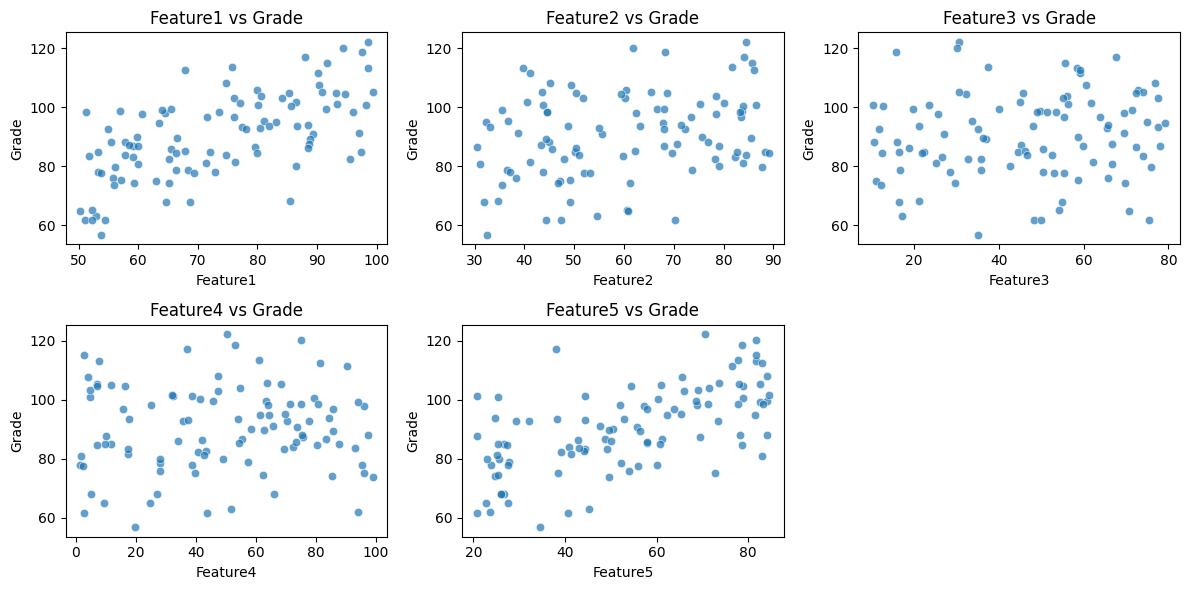

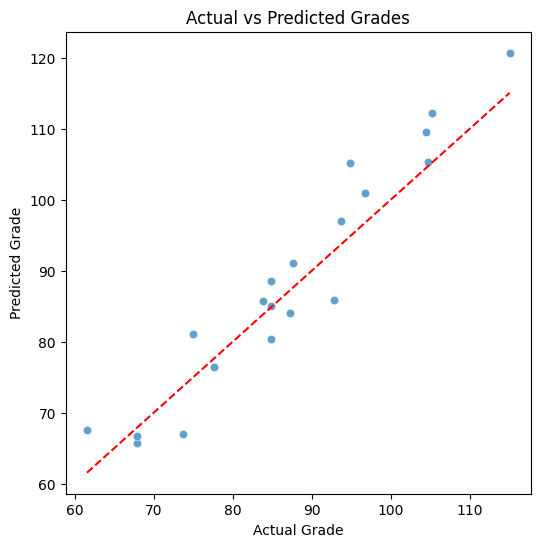

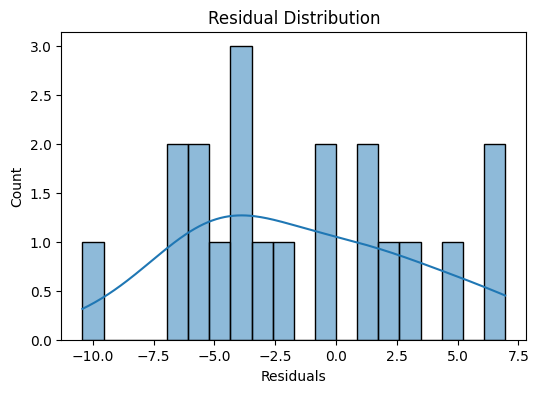

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 6))
for i, feature in enumerate(X.columns, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=X[feature], y=y, alpha=0.7)
    plt.xlabel(feature)
    plt.ylabel("Grade")
    plt.title(f"{feature} vs Grade")

plt.tight_layout()
plt.show()


plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.xlabel("Actual Grade")
plt.ylabel("Predicted Grade")
plt.title("Actual vs Predicted Grades")
plt.show()


residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, bins=20)
plt.xlabel("Residuals")
plt.title("Residual Distribution")
plt.show()
